In [16]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl
import numpy as np
import random
from matplotlib.colors import Normalize
from matplotlib import cm
import matplotlib.patches as patches
import matplotlib
matplotlib.use('Agg')
from matplotlib import gridspec
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.font_manager as font_manager
import copy 
font_dirs = ['/project/elkabetz_lab_data/tools/PythonFonts/', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)
matplotlib.rcParams['font.family'] = 'tahoma'
import seaborn as sns
%matplotlib inline

/project/elkabetz_lab/Daniel/zeus/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.


In [2]:
# Load Kriegstein datasets
adata = sc.read_text("/project/elkabetz_lab_data/public_data/kriegstein_2020/primary_scrna/exprMatrix.tsv.gz")
adata = adata.transpose()
meta = pd.read_csv("/project/elkabetz_lab_data/public_data/kriegstein_2020/primary_scrna/meta.tsv", sep="\t")
meta.index = meta['Cell']
adata.obs = meta.loc[adata.obs.index]

genes = list(adata.var_names)
sc.pp.highly_variable_genes(adata,n_bins=50)
min_mean = 0.0125
top_2000 = sorted(adata.var['dispersions_norm'][adata.var['means'] >= min_mean],reverse=True)[2000]
adata.var['highly_variable'] = (adata.var['dispersions_norm'] >= top_2000) & (adata.var['means'] >= min_mean)
adata.var[adata.var['highly_variable'] == True].sort_values(['dispersions_norm'],ascending=False)[0:50]

,highly_variable,means,dispersions,dispersions_norm
HBG1,True,0.172276,7.582304,24.302601
CCK,True,0.274858,5.346737,13.814931
HBA1,True,0.470012,6.766579,13.769759
HBZ,True,0.558077,7.841081,13.204725
HBE1,True,0.515629,7.709590,12.881159
HBB,True,0.397756,6.427210,12.691525
NPY,True,0.919078,5.330693,10.524662
SPP1,True,0.860368,5.878706,10.447200
BCYRN1,True,0.304332,4.602444,10.332316
CCL3,True,1.066465,6.222032,10.202902


In [3]:
# Load organoid data
adata_dict = {}
line_ = 'FOK1'
adata_dict[line_] = {}
for tx in ['sbnx','sbn']:
    print('loading: ',tx)
    pkl_file = open('/project/elkabetz_lab_data/sequencing/scrna/d50_organoids_exp3/analysis/data/'+line_+'/d50_'+tx+'.pkl', 'rb')
    adata_dict[line_][tx] = pkl.load(pkl_file)
    adata_dict[line_][tx].obs['line'] = [line_ for x in range(len(adata_dict[line_][tx].obs))]
    pkl_file.close()

line_ = 'KUCG2'
adata_dict[line_] = {}
for tx in ['sbnx','sbn']:
    print('loading: ',tx)
    pkl_file = open('/project/elkabetz_lab_data/sequencing/scrna/d50_organoids_exp3/analysis/data/'+line_+'/d50_'+tx+'.pkl', 'rb')
    adata_dict[line_][tx] = pkl.load(pkl_file)
    adata_dict[line_][tx].obs['line'] = [line_ for x in range(len(adata_dict[line_][tx].obs))]
    pkl_file.close()

line_ = 'zip13k5'
adata_dict[line_] = {}
for tx in ['sbnx','sbn','nt']:
    print('loading: ',tx)
    pkl_file = open('/project/elkabetz_lab_data/sequencing/scrna/d50_organoids_exp2/analysis/data/'+line_+'/d50_'+tx+'.pkl', 'rb')
    adata_dict[line_][tx] = pkl.load(pkl_file)
    adata_dict[line_][tx].obs['line'] = ['zip13k5' for x in range(len(adata_dict[line_][tx].obs))]
    pkl_file.close()

line_ = 'zip8k8'
adata_dict[line_] = {}
for tx in ['sbnx','sbn','nt']:
    print('loading: ',tx)
    pkl_file = open('/project/elkabetz_lab_data/sequencing/scrna/d50_organoids_exp2/analysis/data/'+line_+'/d50_'+tx+'.pkl', 'rb')
    adata_dict[line_][tx] = pkl.load(pkl_file)
    adata_dict[line_][tx].obs['line'] = ['zip8k8' for x in range(len(adata_dict[line_][tx].obs))]
    pkl_file.close()

adata_merged = adata_dict['zip13k5']['sbnx'].concatenate(adata_dict['zip13k5']['sbn'],adata_dict['zip13k5']['nt'],
    adata_dict['zip8k8']['sbnx'],adata_dict['zip8k8']['sbn'],adata_dict['zip8k8']['nt'],adata_dict['FOK1']['sbnx'],
    adata_dict['FOK1']['sbn'],adata_dict['KUCG2']['sbnx'],adata_dict['KUCG2']['sbn'])

loading:  sbnx
loading:  sbn
loading:  sbnx
loading:  sbn
loading:  sbnx
loading:  sbn
loading:  nt
loading:  sbnx
loading:  sbn
loading:  nt


In [4]:
genes = list(adata_merged.var_names)
mito_genes = [gene for gene in genes if gene[:3] == 'MT-' or (gene[:2] == 'MT' and '.' in gene)]
rb_genes = [gene for gene in genes if gene[:3] in ['RNR','RPL','RPS','MRP'] or (gene[:2] == 'RP' and '.' in gene)]
adata_merged.obs['n_counts'] = adata_merged.X.sum(axis=1)
y=adata_merged.X > 0
adata_merged.obs['n_genes'] = y.sum(axis=1)
adata_merged.obs['percent_mito'] = np.sum(adata_merged[:, mito_genes].X, axis=1) / np.sum(adata_merged.X, axis=1)
adata_merged.obs['percent_ribo'] = np.sum(adata_merged[:, rb_genes].X, axis=1) / np.sum(adata_merged.X, axis=1)
print('n cells before filter:',len(adata_merged.obs['n_counts']))
sub_cells = adata_merged.obs[(adata_merged.obs['n_counts'] < 10000) & (adata_merged.obs['percent_mito'] < 0.4)]
print('n cells after filter:',len(sub_cells))
adata_merged = adata_merged[sub_cells.index,:]
adata_merged.obs['Index'] = range(len(adata_merged.obs))

/project/elkabetz_lab/Daniel/zeus/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/project/elkabetz_lab/Daniel/zeus/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.obs` of view, copying.


n cells before filter: 96484
n cells after filter: 96454


In [5]:
info = pd.read_csv('/project/elkabetz_lab_data/sequencing/scrna/analysis/merged_d50_10x_v2/data/cell_identity.removed_doublets.tsv',sep='\t')
info.index = info['cell_id']
info = info.drop('cell_id',axis=1)
adata_merged.obs = info.loc[adata_merged.obs.index]

#remove doublets
adata_merged = adata_merged[adata_merged.obs['cell_type'] != 'doublet']
adata_merged = adata_merged[(adata_merged.obs['cell_type'].str.contains('Cortical'))]
y=np.sum(adata_merged.X,axis=0)
adata_merged = adata_merged[:,y>0]

In [6]:
sc.pp.normalize_total(adata_merged,)#, target_sum=1e6)#, inplace=False)
adata_merged.X = np.log1p(adata_merged.X)

sc.pp.highly_variable_genes(adata_merged,n_bins=50)
min_mean = 0.0125
top_2000 = sorted(adata_merged.var['dispersions_norm'][adata_merged.var['means'] >= min_mean],reverse=True)[2000]
adata_merged.var['highly_variable'] = (adata_merged.var['dispersions_norm'] >= top_2000) & (adata_merged.var['means'] >= min_mean)
adata_merged.var[adata_merged.var['highly_variable'] == True].sort_values(['dispersions_norm'],ascending=False)[0:50]

/project/elkabetz_lab/Daniel/zeus/lib/python3.7/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


,highly_variable,means,dispersions,dispersions_norm
XIST,True,0.079186,1.393283,13.099941
LMO3,True,0.180642,1.544377,10.187406
FGF12,True,0.096495,1.017789,9.087228
NEAT1,True,0.122629,1.013587,9.042323
IGFBP5,True,0.133206,0.979717,8.680370
CDH7,True,0.084898,0.844721,7.237734
ASPM,True,0.249518,1.164730,7.213041
SEZ6L,True,0.149482,0.817328,6.944997
PURPL,True,0.189990,1.114315,6.911783
SLC24A2,True,0.096911,0.672664,5.399052


In [7]:
hvg_org = adata_merged.var[adata_merged.var['highly_variable'] == True].index
hvg_krieg = adata.var[adata.var['highly_variable'] == True].index

merged_hvg = set(hvg_org).union(set(hvg_krieg))
merged_hvg_sub = list(merged_hvg.intersection(set(adata.var.index)).intersection(set(adata_merged.var.index)))
hvg_final_sub = list(set(hvg_krieg).intersection(set(adata.var.index)).intersection(set(adata_merged.var.index)))

In [8]:
adata_org = adata_merged

adata = adata[:,merged_hvg_sub]
adata_org = adata_org[:,merged_hvg_sub]

adata.raw_X = copy.deepcopy(adata.X)

In [9]:
sc.pp.scale(adata, max_value=10)
sc.pp.scale(adata_org, max_value=10)

adata.obs.index = adata.obs['Cell']
adata.obs = adata.obs.drop(['Cell'],axis=1)

## merge datasets
adata_merge = adata.concatenate(adata_org,batch_key='sample')
sc.tl.pca(adata_merge)
sc.external.pp.bbknn(adata_merge,batch_key='sample')#,local_connectivity=10)
sc.tl.umap(adata_merge,min_dist=0.1)

/project/elkabetz_lab/Daniel/zeus/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:848: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [10]:
line_ = 'merged_kriegstein_invivo'

adata_merge.obs['cell_type'] = adata_merge.obs['cell_type'].astype('str')
adata_merge.obs['Age'] = adata_merge.obs['Age'].astype('str')

new_cell_types = []
for cell_type,subtype in zip(adata_merge.obs['cell_type'],adata_merge.obs['Subtype']):
    if str(cell_type) != 'nan':
        new_cell_types.append(cell_type)
    else:
        new_cell_types.append(subtype)

adata_merge.obs['cell_type_full'] =  new_cell_types

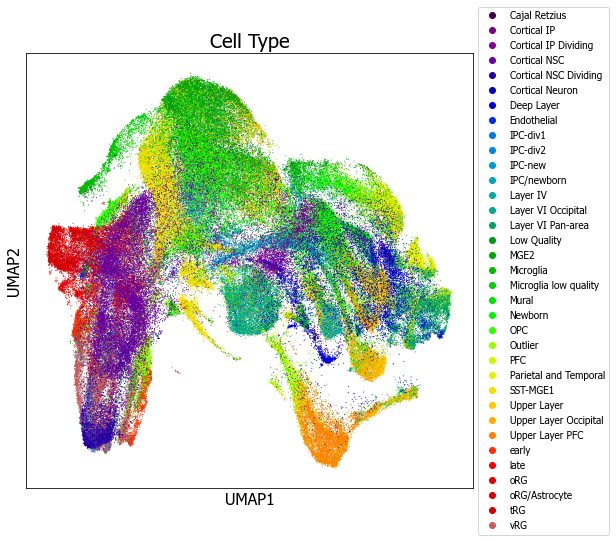

In [17]:
plt.figure(figsize=(10,8))
ax = plt.subplot(111)

clusts = sorted(set(adata_merge.obs['cell_type_full']))
clrs = sns.color_palette('nipy_spectral', n_colors=len(clusts))  # a list of RGB tuples

clrs_dict = {}
for j,cell in enumerate(sorted(set(adata_merge.obs['cell_type_full']))):
    clrs_dict[cell] = clrs[j]

clrs_dict['nan'] = 'lightgray'
final_colors = []
xs = []
ys = []
for j,cell in enumerate(adata_merge.obs['cell_type_full']):
    if cell == 'nan':
        xs.append(adata_merge.obsm['X_umap'][j,0])
        ys.append(adata_merge.obsm['X_umap'][j,1])
        final_colors.append(clrs_dict[cell])

plt.scatter(xs,ys,c=final_colors,s=1,ec=None)

final_colors = []
xs = []
ys = []
for j,cell in enumerate(adata_merge.obs['cell_type_full']):
    if cell != 'nan':
        xs.append(adata_merge.obsm['X_umap'][j,0])
        ys.append(adata_merge.obsm['X_umap'][j,1])
        final_colors.append(clrs_dict[cell])

plt.scatter(xs,ys,c=final_colors,s=1,ec=None)

plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
for j,cell_type in enumerate(clusts):
    plt.plot(-10000,-10000,'.',color=clrs_dict[cell_type],label=cell_type,markersize=12)

plt.title('Cell Type', fontsize=20)
plt.xlabel('UMAP1',fontsize=16)
plt.ylabel('UMAP2',fontsize=16)
plt.xticks([])
plt.yticks([])
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=10)
plt.savefig('figures/'+line_+'/UMAP.cell_type.png',dpi=500)
plt.savefig('figures/'+line_+'/UMAP.cell_type.pdf')

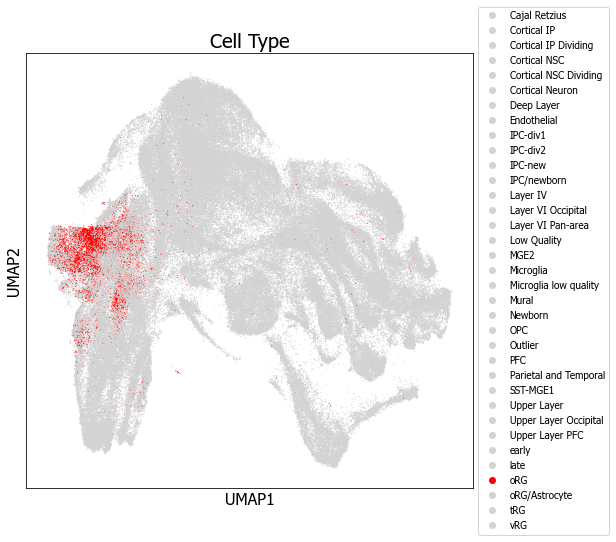

In [18]:
plt.figure(figsize=(10,8))
ax = plt.subplot(111)

clusts = sorted(set(adata_merge.obs['cell_type_full']))
clrs = sns.color_palette('nipy_spectral', n_colors=len(clusts))  # a list of RGB tuples

clrs_dict = {}
for j,cell in enumerate(sorted(set(adata_merge.obs['cell_type_full']))):
    if cell == 'oRG':
        clrs_dict[cell] = 'red'
    else:
        clrs_dict[cell] = 'lightgray'

clrs_dict['nan'] = 'lightgray'
final_colors = []
xs = []
ys = []
for j,cell in enumerate(adata_merge.obs['cell_type_full']):
    if cell == 'nan':
        xs.append(adata_merge.obsm['X_umap'][j,0])
        ys.append(adata_merge.obsm['X_umap'][j,1])
        final_colors.append(clrs_dict[cell])

plt.scatter(xs,ys,c=final_colors,s=1,ec=None)

final_colors = []
xs = []
ys = []
for j,cell in enumerate(adata_merge.obs['cell_type_full']):
    if cell != 'nan':
        xs.append(adata_merge.obsm['X_umap'][j,0])
        ys.append(adata_merge.obsm['X_umap'][j,1])
        final_colors.append(clrs_dict[cell])

plt.scatter(xs,ys,c=final_colors,s=1,ec=None)


plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
for j,cell_type in enumerate(clusts):
    plt.plot(-10000,-10000,'.',color=clrs_dict[cell_type],label=cell_type,markersize=12)

plt.title('Cell Type', fontsize=20)
plt.xlabel('UMAP1',fontsize=16)
plt.ylabel('UMAP2',fontsize=16)
plt.xticks([])
plt.yticks([])
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=10)
plt.savefig('figures/'+line_+'/UMAP.oRG.png',dpi=500)
plt.savefig('figures/'+line_+'/UMAP.oRG.pdf')

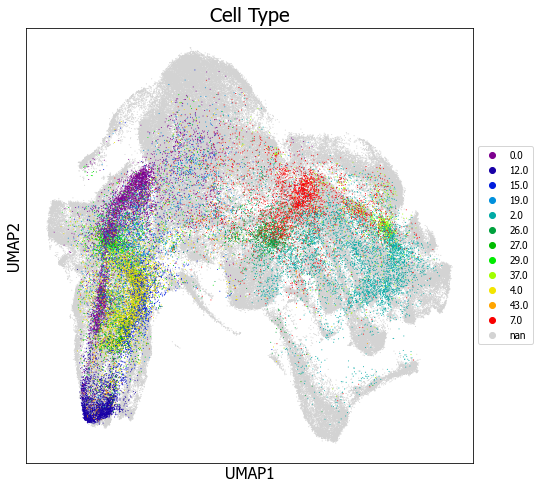

In [19]:
plt.figure(figsize=(10,8))
ax = plt.subplot(111)

adata_merge.obs['louvain'] = adata_merge.obs['louvain'].astype('str')
clusts = sorted(set(adata_merge.obs['louvain']))
clrs = sns.color_palette('nipy_spectral', n_colors=len(clusts))  # a list of RGB tuples

clrs_dict = {}
for j,cell in enumerate(sorted(set(adata_merge.obs['louvain']))):
    clrs_dict[cell] = clrs[j]

clrs_dict['nan'] = 'lightgray'
final_colors = []
xs = []
ys = []
for j,cell in enumerate(adata_merge.obs['louvain']):
    if cell == 'nan':
        xs.append(adata_merge.obsm['X_umap'][j,0])
        ys.append(adata_merge.obsm['X_umap'][j,1])
        final_colors.append(clrs_dict[cell])

plt.scatter(xs,ys,c=final_colors,s=1,ec=None)

final_colors = []
xs = []
ys = []
for j,cell in enumerate(adata_merge.obs['louvain']):
    if cell != 'nan':
        xs.append(adata_merge.obsm['X_umap'][j,0])
        ys.append(adata_merge.obsm['X_umap'][j,1])
        final_colors.append(clrs_dict[cell])

plt.scatter(xs,ys,c=final_colors,s=1,ec=None)

plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
for j,cell_type in enumerate(clusts):
    plt.plot(-10000,-10000,'.',color=clrs_dict[cell_type],label=cell_type,markersize=12)

plt.title('Cell Type', fontsize=20)
plt.xlabel('UMAP1',fontsize=16)
plt.ylabel('UMAP2',fontsize=16)
plt.xticks([])
plt.yticks([])
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=10)
plt.savefig('figures/'+line_+'/UMAP.louvain.png',dpi=500)
plt.savefig('figures/'+line_+'/UMAP.louvain.pdf')

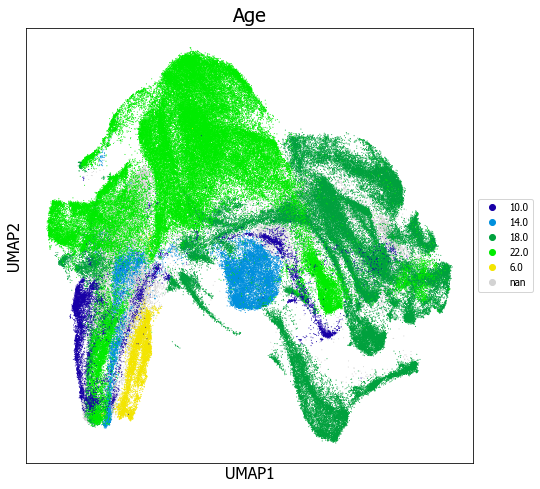

In [20]:
plt.figure(figsize=(10,8))
ax = plt.subplot(111)

clusts = sorted(set(adata_merge.obs['Age']))
clrs = sns.color_palette('nipy_spectral', n_colors=len(clusts))  # a list of RGB tuples

clrs_dict = {}
for j,cell in enumerate(sorted(set(adata_merge.obs['Age']))):
    clrs_dict[cell] = clrs[j]

clrs_dict['nan'] = 'lightgray'
final_colors = []
xs = []
ys = []
for j,cell in enumerate(adata_merge.obs['Age']):
    if cell == 'nan':
        xs.append(adata_merge.obsm['X_umap'][j,0])
        ys.append(adata_merge.obsm['X_umap'][j,1])
        final_colors.append(clrs_dict[cell])

plt.scatter(xs,ys,c=final_colors,s=1,ec=None)

final_colors = []
xs = []
ys = []
for j,cell in enumerate(adata_merge.obs['Age']):
    if cell != 'nan':
        xs.append(adata_merge.obsm['X_umap'][j,0])
        ys.append(adata_merge.obsm['X_umap'][j,1])
        final_colors.append(clrs_dict[cell])

plt.scatter(xs,ys,c=final_colors,s=1,ec=None)


plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
for j,cell_type in enumerate(clusts):
    plt.plot(-10000,-10000,'.',color=clrs_dict[cell_type],label=cell_type,markersize=12)

plt.title('Age', fontsize=20)
plt.xlabel('UMAP1',fontsize=16)
plt.ylabel('UMAP2',fontsize=16)
plt.xticks([])
plt.yticks([])
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=10)
plt.savefig('figures/'+line_+'/UMAP.Age.png',dpi=500)
plt.savefig('figures/'+line_+'/UMAP.Age.pdf')

In [23]:
cell_type_dict = {}
for clust,cell_type in zip(adata_org.obs['louvain'],adata_org.obs['cell_type']):
    cell_type_dict[clust]=cell_type


primary_clust_order_sub = [28,17,16,5,11,1,25,42,9,40,20,
                          26,34,38,27,36,29,22,35,31,41,13,15,19,23,
                          2,21,37,33,6,10,4,3,12,30,7,39,18,8,24,14,32]


primary_clust_profiles = {}
for clust in primary_clust_order_sub:
    primary_clust_profiles[clust] = np.mean(adata_merge.X[adata_merge.obs['Cluster']==clust],axis=0)

adata_merge.obs['louvain'] = adata_merge.obs['louvain'].astype('float')
org_clust_profiles = {}
for clust in set(adata_org.obs['louvain']):
    org_clust_profiles[clust] = np.mean(adata_merge.X[adata_merge.obs['louvain']==clust],axis=0)

org_clusts = [12,27,15,4,0,19,29,43,7,26,37,2]#,6,7,12,11,8,9,10]

corrs = []
for j,clust in enumerate(org_clusts):#clust_dict:#[clust_dict_r[x] for x in [1,2,3,4,5]]:
    for k,clust_p in enumerate(primary_clust_order_sub):
        corrs.append(np.corrcoef(primary_clust_profiles[clust_p],org_clust_profiles[clust])[0][1])

min_corr = min([x for x in corrs if x != -2])
max_corr = max(corrs)
print(min_corr,max_corr)
normed_cmap = Normalize(vmin=min_corr, vmax=max_corr)

clust_dict_ref = {}
for type_,cell_type,cluster in zip(adata.obs['Type'],adata.obs['Subtype'],adata.obs['Cluster']):
    if 'IPC' in type_ or 'IPC' in cell_type: clust_dict_ref[cluster] = 'IPC'
    elif 'MGE' in cell_type: clust_dict_ref[cluster] = 'MGE Neuron'
    elif 'Neuron' in type_: clust_dict_ref[cluster] = 'Cortical Neuron'
    elif 'OPC' in type_ or 'Astro' in cell_type: clust_dict_ref[cluster] = 'OPC/Astrocyte'
    elif cell_type == 'vRG': clust_dict_ref[cluster] = 'vRG'
    elif cell_type == 'oRG': clust_dict_ref[cluster] = 'oRG'
    elif cell_type == 'tRG': clust_dict_ref[cluster] = 'tRG'
    elif cell_type == 'early': clust_dict_ref[cluster] = 'early RG'
    elif cell_type == 'late': clust_dict_ref[cluster] = 'late RG'
    elif type_ == 'Microglia': clust_dict_ref[cluster] = 'Microglia'
    elif 'Glia' in type_ and 'Low' in cell_type: clust_dict_ref[cluster] = 'RG Low Quality'
    else: clust_dict_ref[cluster] = 'Non-neural/Outlier'

for cell_type in set(clust_dict_ref.values()):
    print(cell_type)

color_dict = {}
color_dict['tRG'] = (208./255.,62./255,105./255)
color_dict['IPC'] = (2./255,205./255,147./255)
color_dict['Cortical Neuron'] = (99./255,183./255,255./255)
color_dict['MGE Neuron'] = (198./255,225./255,254./255)
color_dict['Microglia'] = (244./255,164./255,96./255)
color_dict['late RG'] = (255./255,68./255,0./255)
color_dict['early RG'] = (236./255,199./255,214./255)
color_dict['Non-neural/Outlier'] = (46./255,138./255,87./255)
color_dict['OPC/Astrocyte'] = (139./255,1./255,0./255)
color_dict['oRG'] = (239./255,79./255,225./255)
color_dict['vRG'] = (188./255,59./255,155./255)
color_dict['RG Low Quality'] = 'silver'

-0.5749426894033433 0.8486401239693492
Microglia
OPC/Astrocyte
MGE Neuron
tRG
vRG
RG Low Quality
IPC
oRG
early RG
Cortical Neuron
late RG
Non-neural/Outlier


/project/elkabetz_lab/Daniel/zeus/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


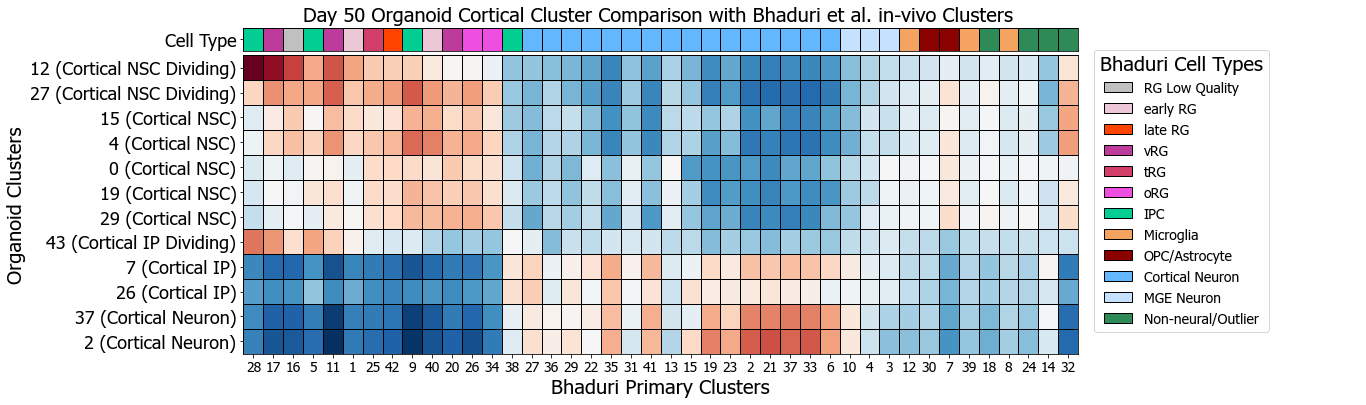

In [24]:
colormap = cm.RdBu_r
fig = plt.figure(figsize=(20,6))
ax = plt.subplot(111)
gs = gridspec.GridSpec(12,20,wspace=0.2, hspace=0.2)
ax = plt.subplot(gs[1:,:15])

cell_type_dict = {}
for clust,cell_type in zip(adata_org.obs['louvain'],adata_org.obs['cell_type']):
    cell_type_dict[clust]=cell_type

for j,clust in enumerate(org_clusts):#clust_dict:#[clust_dict_r[x] for x in [1,2,3,4,5]]:
    for k,clust_p in enumerate(primary_clust_order_sub):
        corr_ = np.corrcoef(primary_clust_profiles[clust_p],org_clust_profiles[clust])[0][1]
        color = tuple(np.array(colormap(normed_cmap(corr_),bytes=True))/255.)
        if corr_ == -2:
            p = patches.Rectangle((k-1/2.,-j-1/2.), 1, 1, fill=True,
                                  facecolor='white', linestyle='-',edgecolor='black')
        else:
            p = patches.Rectangle((k-1/2.,-j-1/2.), 1, 1, fill=True,
                                  facecolor=color, linestyle='-',edgecolor='black')
        ax.add_patch(p)

plt.xlim(-0.5,k+0.5)
plt.ylim(-j-0.5,0.5)
plt.xticks(range(len(primary_clust_order_sub)),primary_clust_order_sub,fontsize=14)
plt.yticks(range(0,-len(org_clusts),-1),[str(x) + ' ('+cell_type_dict[x]+')' for x in org_clusts],fontsize=18)
plt.tight_layout()
plt.xlabel('Bhaduri Primary Clusters',fontsize=20)
plt.ylabel('Organoid Clusters',fontsize=20)

ax = plt.subplot(gs[0:1,:15])
for j,clust in enumerate(primary_clust_order_sub):
    p = patches.Rectangle((j-1/2.,0), 1, 1, fill=True,
                                  facecolor=color_dict[clust_dict_ref[clust]], linestyle='-',edgecolor='black')
    ax.add_patch(p)

plt.title('Day 50 Organoid Cortical Cluster Comparison with Bhaduri et al. in-vivo Clusters ',fontsize=20)
plt.xlim(-0.5,len(primary_clust_order_sub)-0.5)
plt.ylim(0,1)
plt.yticks([0.5],['Cell Type'],fontsize=18)
plt.xticks([])

ax = plt.subplot(gs[:,15:])

for cell_type in ['RG Low Quality','early RG','late RG','vRG','tRG','oRG','IPC','Microglia',
                  'OPC/Astrocyte','Cortical Neuron','MGE Neuron','Non-neural/Outlier']:
    plt.bar(-10,0,color=color_dict[cell_type],label=cell_type,linestyle='-',edgecolor='black')

plt.xlim(0,1)
plt.ylim(1,2)
plt.legend(loc='center left',fontsize=14,title='Bhaduri Cell Types',title_fontsize=20)
plt.axis('off')

plt.savefig('figures/'+line_+'/corr_heatmap.Rd_Bu_r.no_genes.png',bbox_inches='tight',dpi=500)

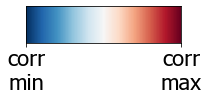

In [28]:
colormap = cm.RdBu_r
normed_cmap = Normalize(vmin=0, vmax=1)
plt.figure(figsize=(3,1.5))
ax=plt.subplot(111)
max_y=255
min_val,max_val = 0,1
for j,val in enumerate(np.linspace(min_val,max_val,max_y)):
    color = tuple(np.array(colormap(normed_cmap(val),bytes=True))/255.)
    p = patches.Rectangle((j,0), 1, 1, fill=True, facecolor=color, linestyle='-',edgecolor=color)
    ax.add_patch(p)

plt.ylim(0,1)
plt.xticks(np.linspace(0,max_y,2),['corr\nmin','corr\nmax'],fontsize=22)
plt.xlabel('')
plt.yticks([])
plt.tight_layout()
plt.savefig('figures/'+line_+'/corr_heatmap.legend.png',bbox_inches='tight',dpi=500)